# Handwritten digit recognizer
Por: Tomás Antonio Saavedra Barrientos RUT 21.247.247-1, Katherin Daniela Núñez Hassinger RUT: 21.166.396-0, Francisco Ignacio Gatica Peña RUT 21.107.985-1.
<br/>

Este estudio se centra en el desarrollo de un modelo basado en CNN para reconocer dígitos manuscritos, utilizando como base un proyecto y su correspondiente conjunto de datos extraídos de Kaggle, con el objetivo de establecer un proceso eficaz para digitalizar el lenguaje humano.

El proyecto incluye el preprocesamiento de imágenes de imágenes manuscritas para mejorar la calidad de los datos, estas imágenes serán nuestra entrada y servirán para entrenar el modelo, además incorpora el uso de técnicas de aumento de datos por medio de escalamiento, para ampliar el conjunto de entrenamiento.
Para realizar el reconocimiento de dígitos, utilizamos redes neuronales convolucionales (CNN), un tipo de red neuronal diseñada específicamente para procesar datos estructurados espacialmente, como las imágenes. Las CNN aplican filtros convolucionales que captaron características importantes de las imágenes, como los bordes y las texturas, lo que permite al modelo aprender patrones relevantes para la clasificación de dígitos. Por último, la salida del modelo es una tabla con dos columnas: una representa el ID de la imagen de entrada y la otra indica el dígito reconocido.
El modelo utiliza diferentes técnicas orientadas a la eficiencia y eficacia, aplicadas en diferentes etapas, estas se detalladan en la siguiente sección.

Dentro de los objetivos clave se incluyen la implementación exitosa de un modelo funcional de reconocimiento de dígitos, una comprensión profunda de su funcionamiento interno y la exploración de aplicaciones en la digitalización de documentos y la recuperación de información, con especial énfasis en la mejora de la precisión.

Versión: pandas==1.3.3
numpy==1.21.2
scikit-learn==0.24.2
keras==2.6.0
tensorflow==2.6.0

Fuente:  https://www.kaggle.com/code/cdeotte/25-million-images-0-99757-mnist/notebook


# Técnicas utilizadas

Para la creación  y entrenamiento del modelo se utilizaron las siguientes técnicas:  

1 **Función de activación ReLU y softmax**: como su nombre lo indica corresponden a  funciones matemáticas aplicadas a las salidas de las neuronas de una capa para introducir no linealidad. Estas funciones determinan cómo se transforman las activaciones antes de ser pasadas a la siguiente capa.

2 **Función de pérdida(loss) “categorical_crossentropy”**: es similar a la popular “crossentropy” pero para una clasificación multicategoría. Esta función es una medida que evalúa qué tan bien está funcionando un modelo de aprendizaje automático durante su entrenamiento, es decir, cuantifica la diferencia entre las predicciones del modelo y los valores reales o esperados. El propósito es guiar el proceso de optimización del modelo, entendiendo que este ajusta sus parámetros para minimizar la pérdida.


3 **Optimización(optimizer) "Adam"**: las opciones que consideramos utilizar son el enfoque de Descenso Gradiente Estocástico (SGD), que ajusta iterativamente los parámetros de un modelo de aprendizaje automático para minimizar una función de pérdida, así como la Estimación Adaptativa de Momentos (Adam), que combina las ventajas de «AdaGrad» y «RMSProp», al ser eficiente desde el punto de vista computacional y de memoria, y adecuado para grandes volúmenes de datos y parámetros. Finalmente se optó por este último debido a las ventajas que posee tales como: tiempos de aprendizajes más rápidos, eficacia en entornos con ruido, ya que emplea momentos adaptativos para modificar tanto la dirección como la velocidad de las actualizaciones, facilita el ajuste de los pesos en la red, permitiendo que responda de manera más eficiente en el reconocimiento de imágenes y finalmente puede modificar durante el entrenamiento automáticamente su tasa de aprendizaje, algo que el método SGD no se puede.

4 **Batch normalization**: es una técnica de preprocesamiento presente en el entrenamiento que normaliza las entradas de cada capa de la red neuronal dentro de cada mini lote de datos. En concreto, la media y la varianza de las activaciones de una capa se calculan para cada lote, y esta información se utiliza para escalar y desplazar las activaciones de modo que tengan una distribución con media cero y varianza unitaria. No introduce la no linealidad ni transforma las salidas de forma similar a las funciones de activación, sino que las "ajusta" para que el entrenamiento sea más estable y eficiente.

5 **Técnica “dropout”**: apaga aleatoriamente neuronas en cada paso durante el entrenamiento para evitar que el modelo se sobreajuste, haciendo el modelo se vuelva más general, ya que no puede depender de neuronas específicas y debe aprender representaciones más diversas, así como también mejora de la generalización haciendo a nuestro modelo menos propenso a memorizar los datos de entrenamiento y, por lo tanto, mejora su capacidad para generalizar a datos que no ha visto antes.


6 **Técnica “learningRateScheduler”**: se utiliza para ajustar dinámicamente la tasa de aprendizaje a lo largo de las épocas, con el fin de mejorar la eficiencia y la convergencia del modelo, esto se logra usando una tasa variable que va disminuyendo en vez de una tasa de aprendizaje constante. Al reducir la tasa de aprendizaje con el tiempo, el modelo puede aprender de manera más efectiva, evitando grandes saltos en el espacio de parámetros y permitiendo un ajuste más preciso en las últimas etapas del entrenamiento.


# Paso 0: Instalar librerias

In [ ]:
!pip install keras
!pip install tensorflow

# Paso 1: Importar librerias

A continuación se presentara un modelo de predcicción de imagenes, el cual cuenta con una CNN (convolutional neural network) que clasifica los dígitos MNIST de Kaggle, se entrenan con 1.699.200 imágenes obtenidas de la modificación en tiempo real de los datos de "train.csv".

Utiliza técnicas que incluyen el aumento de datos, las capas de convolución no lineal, la activación de ReLu, reducción en las tasas de aprendizaje, dropout, la normalización de lotes y la optimización de Adam



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import metrics, backend as K
from google.colab import files
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import precision_score, recall_score, f1_score



# Paso 2: Cargar los dataset

In [2]:
# Dar acceso a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargar los Dataset
train = pd.read_csv('/content/drive/MyDrive/8.º SEMESTRE/EII4220 INTRODUCCION A DATA SCIENCE/Proyecto semestral/train.csv')
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Paso 3: Preprocesamiento de datos

In [4]:
Y_train = train["label"]  #Extrae de "train" la columna "label"(0-9) P-value
Y_train = to_categorical(Y_train, num_classes = 10) #Convierte las etiquetas numéricas(0-9) en un formato de codificación one-hot, es decir, un vector de 10 posiciones, donde la posición correspondiente al dígito es 1 y las demás posiciones son 0. ej 3=[0,0,0,1,0,0,0,0,0,0]

X_train = train.drop(labels = ["label"],axis = 1) #Elimina la columna "label" del DataFrame "train"
X_train = X_train / 255.0 #Normaliza los valores diviendolos por 255 obteniendo rango de 0-1
X_train = X_train.values.reshape(-1,28,28,1) #Redimensionamiento de los datos, convierte el DataFrame en un array de numpy.

In [ ]:
#visualización de Y_train en formato one-hot
Y_train_df = pd.DataFrame(Y_train)
Y_train_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Paso 4: Preview de las imagenes del dataset

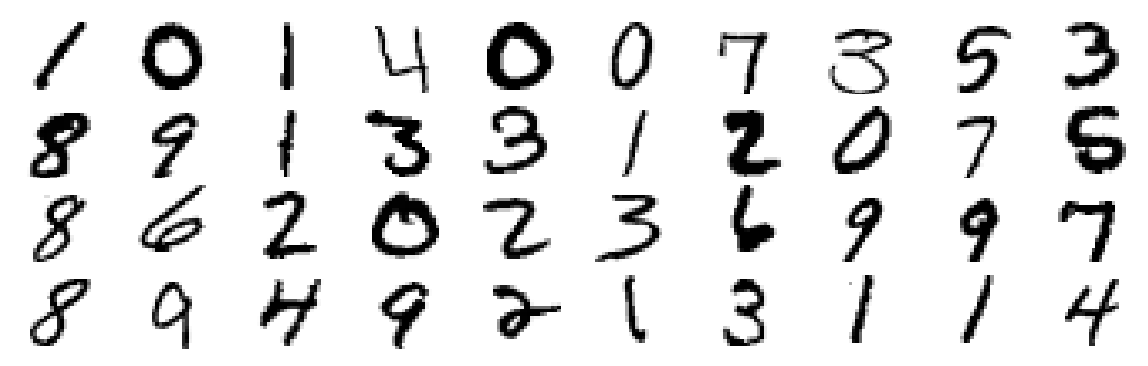

In [ ]:
# Preview imagenes
plt.figure(figsize=(15,4.5)) #Crea la figura para el grafico
for i in range(40): #Itera para las primeras 30 fotos
    plt.subplot(4, 10, i+1) #Crea una cuadrícula de subplots (gráficos pequeños) de 3 filas y 10 columnas
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)#Toma la imagen i-esima, la convierte en una matriz 28 por 28, muestra en una escala de grises
    plt.axis('off') #Oculta ejes
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)#Hace que las imagenes esten mas juntas
plt.show()

# Paso 5: Crear más imagenes </br>
Esto lo logra mediante el aumento de datos, es decir, aumenta la variedad de las imagenes por medio de transformaciones aleatorias.</br>
*no se está realizando ninguna modificación solamente esta creando el "generador"


In [6]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range = 0.10, width_shift_range=0.1, height_shift_range=0.1)

# Paso 6: Preview de las imagenes aumentadas

Este código genera 30 imágenes aumentadas a partir de tres imágenes originales (las posiciones 1, 9 y 19 de X_train) y las muestra en una cuadrícula. Cada conjunto de 10 imágenes se genera a partir de una de las imágenes originales, aplicando transformaciones como rotación, zoom y desplazamiento, según lo configurado en "datagen"

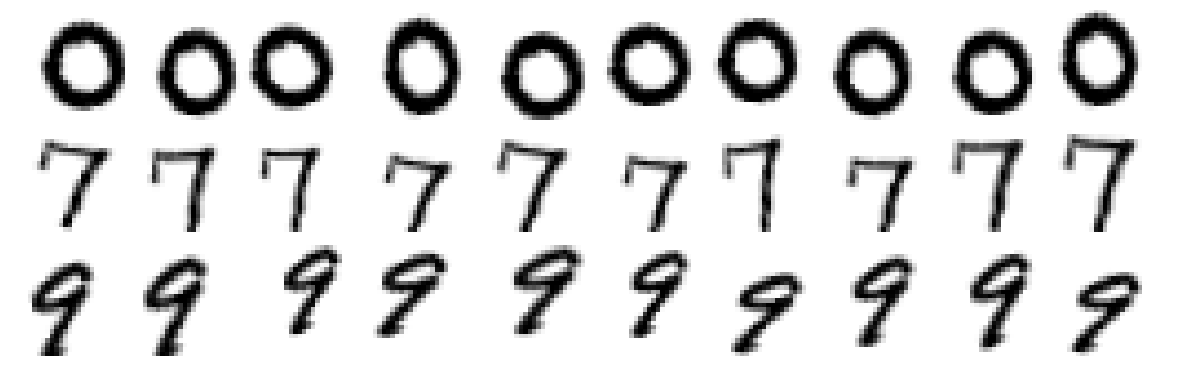

In [7]:
j=1

X_train3 = X_train[j].reshape((1,28,28,1)) #Redimensiona la imagen i en una array 4 dimensiones: (1, 28, 28, 1), que representa una sola imagen (1) de 28x28 píxeles en escala de grises (1 canal).
Y_train3 = Y_train[j].reshape((1,10)) #Redimensiona la imagen i al número del (1, 10)
#Y_train3 se utiliza para asegurar que la imagen generada mantenga la etiqueta que corresponde

plt.figure(figsize=(15,4.5))#crea la figura
for i in range(30): #Itera 30 veces para generar y mostrar 30 imágenes.
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).__next__() #Genera imagen modificada a partir de partir de la imagen original (X_train3) y su etiqueta (Y_train3), __next__() obtiene la sgte imagen modificada (X_train2,Y_train2)
    plt.imshow(X_train2.reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[j+5].reshape((1,28,28,1)) #Construye primera fila
    if i==19: X_train3 = X_train[j+10].reshape((1,28,28,1)) #Construye segunda fila
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

# Paso 7: Construir redes neuronales convolucionales(CNN)
Se crea un modelo cuya primera capa “input” define la forma de entrada de los datos, luego 7 capas  convolucionales y por último la capa fully connected con 10 unidades correspondientes a las 10 clases de salida (0-9), Durante la construcción del modelo es donde se utilizan las diversas técnicas tales como: función de activación “ReLU” y “softmax” así como “batchnormalizacion” y “dropout”.
Finalmente se compila el modelo utilizando el método de optimización “adam”, una función de pérdida “categorical_crossentropy” y métricas como Accuracy, Recall y Precision.


In [ ]:
    model = [0]  #Aquí se inicializa una lista que almacenara el modelo secuencial.
    model[0] = Sequential() #Crea un modelo con capas secuenciales y lo almacena en la primera posicion(0) de la lista "model"

    # Usar Input como la primera capa para definir la forma de entrada
    model[0].add(Input(shape=(28, 28, 1))) #Define la forma de la entrada para la red, 28x28 y 1 canal de color

    #Primera serie de capas convolucionales
    model[0].add(Conv2D(32, kernel_size=3, activation='relu')) #Aplica una convolución 2D a la imagen con 32 filtros y un tamaño de kernel de 3x3. La función de activación utilizada es ReLU (Rectified Linear Unit), que introduce no linealidad en la red.
    model[0].add(BatchNormalization()) #Normaliza las activaciones de la capa anterior para estabilizar el proceso de aprendizaje y mejorar la convergencia.
    model[0].add(Conv2D(32, kernel_size=3, activation='relu'))
    model[0].add(BatchNormalization())
    model[0].add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu')) #Aplica una convolución 2D con un kernel de 5x5, un stride de 2 (reduciendo las dimensiones espaciales a la mitad), y padding 'same', que mantiene el tamaño de la salida constante respecto a la entrada
    model[0].add(BatchNormalization())
    model[0].add(Dropout(0.4)) #Aplica Dropout, desactivando aleatoriamente el 40% de las neuronas en la capa durante el entrenamiento, lo que ayuda a prevenir el overfitting.

    #Segunda serie de capas convolucionales, similar a la primera solo que se incrementa el nuemro de filtros a 64
    model[0].add(Conv2D(64, kernel_size=3, activation='relu'))
    model[0].add(BatchNormalization())
    model[0].add(Conv2D(64, kernel_size=3, activation='relu'))
    model[0].add(BatchNormalization())
    model[0].add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
    model[0].add(BatchNormalization())
    model[0].add(Dropout(0.4))

    #Capa Convolucional Final y Capas de salida
    model[0].add(Conv2D(128, kernel_size=4, activation='relu'))#Capa con 128 filtros
    model[0].add(BatchNormalization())
    model[0].add(Flatten()) #Aplana las salidas de la última capa convolucional en un vector unidimensional, que puede ser procesado por una capa densa
    model[0].add(Dropout(0.4))
    model[0].add(Dense(10, activation='softmax'))#La capa final es una capa densa (fully connected) con 10 unidades, que corresponde a las 10 clases de salida. La función de activación softmax asegura que la salida sea un vector de probabilidades, sumando 1, donde cada elemento indica la probabilidad de que la imagen pertenezca a esa clase.

    # Compilar el modelo
    model[0].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", metrics.Recall(), metrics.Precision()]) #Optimizador Adam, función de pérdida de entropía cruzada categórica(para multinivel) y metrica de precisión Accuracy, Recall y Precisión




# Paso 8: Entrenamiento de la red

En esta etapa se empieza definiendo un una tasa de aprendizaje que va disminuyendo en cada época, seguido a esto se divide al azar nuestro dataset en dos siguiendo una distribución 90/10, obteniendo un subconjunto destinado para el entrenamiento y otro para la validación respectivamente.
En este punto el modelo se comienza a entrenar almacenando en una lista los valores obtenido en cada época esto para luego poder hacer un análisis de lo que ocurre en cada etapa del proceso de entrenamiento.

<br/>

**fit**: Entrena el modelo model[0] usando el generador de datos datagen para aplicar aumentos de datos sobre la marcha.

**Parámetros**:

**datagen.flow(X_train2, Y_train2, batch_size=64)**: Genera lotes de datos aumentados con un tamaño de 64.

**epochs**: Número total de épocas de entrenamiento (45).Una época representa una pasada completa sobre el conjunto de datos de entrenamiento, en este caso es una pasada por cada batch o lote.

**steps_per_epoch**:es el número total de lotes (batches) que el modelo necesita procesar para completar una época. Por lo tanto, el número de pasos se calcula dividiendo el número total de ejemplos de entrenamiento entre el tamaño del lote, determinado por X_train2.shape[0] // 64 (siendo X_train2.shape[0] que devuelve el número total de ejemplos en el conjunto de datos X_train2. El índice 0 hace referencia a la primera dimensión del array, que normalmente representa la cantidad de ejemplos (o imágenes) en el conjunto de entrenamiento, // division entera y 64 eñ tamaño de batch)

**validation_data**: Datos de validación (X_val2, Y_val2) para evaluar el rendimiento después de cada época.

**callbacks**: Incluye el annealer para ajustar la tasa de aprendizaje.

**verbose**: Configurado en 1 para mostrar información detallada durante el entrenamiento.



In [ ]:
# Disminuir la tasa de aprendizaje en cada epoca
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x) #Ajusta la tasa de aprendizaje en cada época(x), disminuyendo en un 5%, ayuda a que el modelo converja de manera más suave y evite grandes oscilaciones cerca de los mínimos del error.

# División del conjunto de datos
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1) #Divide el conjunto de datos al azar X_train y Y_train en dos subconjuntos: uno para entrenamiento (X_train2, Y_train2) y otro para validación (X_val2, Y_val2). El 10% de los datos se usa para la validación (test_size = 0.1) y el 90% para el entrenamiento

# Entrenar el modelo
history = [0]  #Inicializa una lista para almacenar el historial de entrenamiento. Esta lista contendrá objetos que registran métricas como la precisión y la pérdida a lo largo de las épocas.
epochs = 45 #Establece el número de épocas para entrenar cada red
history[0] = model[0].fit(datagen.flow(X_train2,Y_train2, batch_size=64),
                          epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,
                          validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=1)

print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(0+1,epochs,max(history[0].history['accuracy']),max(history[0].history['val_accuracy']) ))

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


590/590 ━━━━━━━━━━━━━━━━━━━━ 168s 270ms/step - accuracy: 0.6958 - loss: 1.0078 - precision: 0.7721 - recall: 0.6401 - val_accuracy: 0.9779 - val_loss: 0.0700 - val_precision: 0.9804 - val_recall: 0.9757 - learning_rate: 0.0010
Epoch 2/45
  1/590 ━━━━━━━━━━━━━━━━━━━━ 2:07 216ms/step - accuracy: 0.8906 - loss: 0.2684 - precision: 0.9333 - recall: 0.8750

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


590/590 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8906 - loss: 0.2684 - precision: 0.9333 - recall: 0.8750 - val_accuracy: 0.9779 - val_loss: 0.0706 - val_precision: 0.9804 - val_recall: 0.9757 - learning_rate: 9.5000e-04
Epoch 3/45
590/590 ━━━━━━━━━━━━━━━━━━━━ 160s 270ms/step - accuracy: 0.9566 - loss: 0.1512 - precision: 0.9647 - recall: 0.9488 - val_accuracy: 0.9898 - val_loss: 0.0329 - val_precision: 0.9905 - val_recall: 0.9883 - learning_rate: 9.0250e-04
Epoch 4/45
590/590 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9688 - loss: 0.0817 - precision: 0.9683 - recall: 0.9531 - val_accuracy: 0.9893 - val_loss: 0.0330 - val_precision: 0.9914 - val_recall: 0.9881 - learning_rate: 8.5737e-04
Epoch 5/45
590/590 ━━━━━━━━━━━━━━━━━━━━ 198s 270ms/step - accuracy: 0.9705 - loss: 0.1044 - precision: 0.9744 - recall: 0.9659 - val_accuracy: 0.9810 - val_loss: 0.0540 - val_precision: 0.9833 - val_recall: 0.9805 - learning_rate: 8.1451e-04
Epoch 6/45
590/590 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step

# Paso 9: Predicciones del conjunto y enviar/presentar


In [ ]:
#Crea una matriz de ceros de tamaño (numero de filas o ejemplos de x_val2, 10)
Y_val_pred = np.zeros( (X_val2.shape[0],10) ) #Almacenará los resultados de las predicciones de cada modelo

#Realiza predicciones sobre el conjunto de prueba X_val2
Y_val_pred = model[0].predict(X_val2) #Valor predicho, el modelo (model[0].predict(X_val2)) y agrega estas predicciones al arreglo "Y_val_pred".

#Convertir las predicciones a clases (las probabilidades más altas)
Y_val_pred = np.argmax(Y_val_pred, axis=1) #Se selecciona la clase (dígito) con la mayor probabilidad para cada muestra, Esto da como resultado un vector results que contiene las predicciones finales para cada muestra en X_test.

#Obtener valor real
Y_val_true = np.argmax(Y_val2, axis=1)

# Calcular precisión, recall y F1-score
precision = precision_score(Y_val_true, Y_val_pred, average='weighted')
recall = recall_score(Y_val_true, Y_val_pred, average='weighted')
f1 = f1_score(Y_val_true, Y_val_pred, average='weighted')

# Mostrar las métricas junto con las ya obtenidas de accuracy
print(f"Metricas finales después de {epochs} epocas:")
print(f"Train accuracy: {max(history[0].history['accuracy']):.5f}")
print(f"Validation accuracy: {max(history[0].history['val_accuracy']):.5f}")
print(f"Validation Precision: {precision:.5f}")
print(f"Validation Recall: {recall:.5f}")
print(f"Validation F1-score: {f1:.5f}")

132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step
Final metrics after 45 epochs:
Train accuracy: 1.00000
Validation accuracy: 0.99619
Validation Precision: 0.99620
Validation Recall: 0.99619
Validation F1-score: 0.99619


A continuación, se entregan las interpretaciones de las métricas obtenidas:

**Accuracy**:  el modelo clasificó correctamente un 99.619% del total de predicciones. <br/>
**Precisión**: un 99.620%  de los números que el modelo identificó como correctos, son realmente correctos. <br/>
**Recall**: el modelo detectó correctamente el 99.619% de todos los dígitos que debía identificar.<br/>
**F1-score**: un 0.99619 indica  que el modelo es altamente preciso y sensible.



In [ ]:
#Crear csv de resultados

#Convertir el vector en una serie de pandas similar a una columna de un dataframe
Y_val_pred = pd.Series(Y_val_pred,name="Y_val_pred") #Vector de predicciones
Y_val_true = pd.Series(Y_val_true, name="Y_val_true") #Vector de etiquetas

submission = pd.concat([pd.Series(range(1,4201),name = "ImageId"),Y_val_pred,Y_val_true],axis = 1) #Se crea una nueva Serie de pandas con valores que van del 1 al 28,000 (por las 28,000 imágenes en el conjunto de prueba), luego se concatenan esta serie(columna) con otra serie que contiene los ImageId (números de identificación de las imágenes), formando un DataFrame submission con tres columnas: "ImageId", "Y_val_pred" y "Y_val_true".

#Descargar csv
submission.to_csv("MNIST-CNN-RESULT.csv",index=False) #Se guarda el DataFrame submission como un archivo CSV llamado "MNIST-CNN-RESULT.csv"
files.download("MNIST-CNN-RESULT.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Paso 10: Preview de las predicciones

El siguiente código permite tener una representación visual de las predicciones que realiza el modelo.

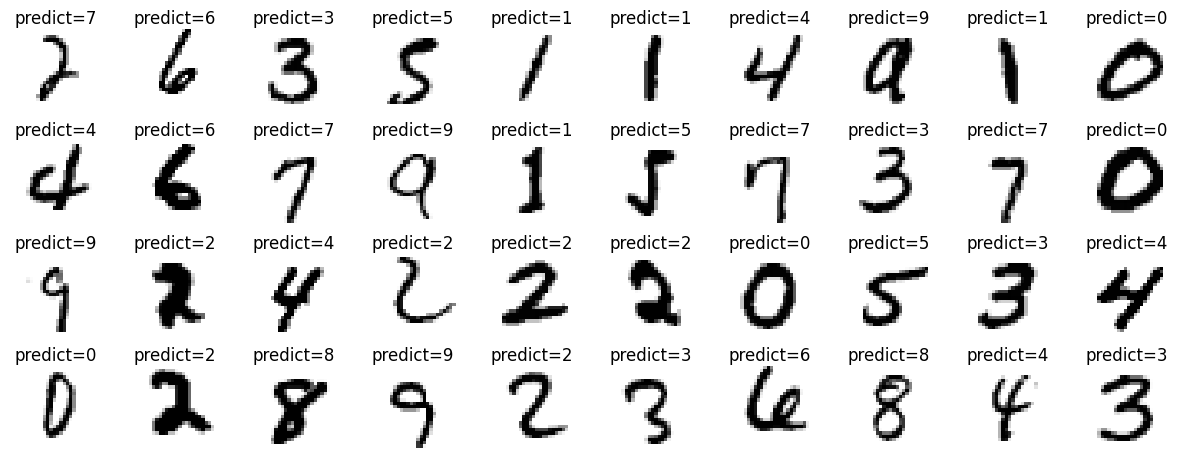

In [ ]:
# PREVIEW DE LAS PREDICCIONES
plt.figure(figsize=(15,6)) #configura el tamaño de la figura para la visualización
for i in range(40):
    plt.subplot(4, 10, i+1)
    plt.imshow(X_val2[i].reshape((28,28)),cmap=plt.cm.binary) #Muestra la figura actual
    plt.title("predict=%d" % Y_val_pred[i],y=0.9) #Muestra la predicción (Y_val_pred[i] contiene la predicción del modelo para la imagen i, y=0.9 ajusta la posición vertical del título)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

# Conclusión

Como se puede observar en la sección resultados, las métricas de rendimiento de nuestro modelo son bastantes altas, haciendo que este en muy pocas ocasiones se “equivoque”, por lo que en etapas futuras sería interesante buscar la manera de disminuir estos errores en la predicción, para esto proponemos la implementación de técnicas de Ensemble las que consisten en la creación y entrenamiento de múltiples modelos en paralelo, esto se utiliza porque al combinar varios modelos los errores de uno pueden ser compensados por otros, con esto se logra una mejor generalización y una mayor precisión.

Lo siguiente en el desarrollo de este modelo sería la implementación de un medio interactivo a modo de darle una aplicación que sea de utilidad para quien interactúe con este como la digitalización de documentos, el reconocimiento de cheques o formularios, la automatización de la facturación o sistemas de acceso vehicular.

Como grupo, consideramos que el potencial de proyectos como este es inmenso. Las aplicaciones que se pueden derivar de la detección de números manuscritos van desde tareas simples, hasta problemas mucho más complejos. Cada modelo desarrollado en este tipo de proyectos ofrece un campo amplio de mejora, lo que permite seguir puliendo y optimizando diferentes aspectos, con el objetivo de lograr resultados cada vez más precisos y eficientes.

Si bien el proceso de desarrollo e implementación de un modelo de deep learning es desafiante y requiere tiempo, los avances obtenidos en términos de rendimiento y la posibilidad de aplicarlos a problemas reales hacen que el esfuerzo invertido sea totalmente justificable. En definitiva, creemos que este tipo de proyectos representan una valiosa oportunidad para aprender y mejorar como futuros profesionales


